<a href="https://colab.research.google.com/github/Lirgis0/A_B_test/blob/main/project_a_b_fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
from plotly import graph_objects as go
import plotly.express as px
import math as mth

In [2]:
pd.set_option('display.float_format', '{:.4f}'.format)

## Загрузка и знакомство с датасетом

### Загрузка

In [3]:
marketing=pd.read_csv('.../ab_project_marketing_events.csv')
user=pd.read_csv('.../final_ab_new_users.csv')
event=pd.read_csv('.../final_ab_events.csv')
member=pd.read_csv('.../final_ab_participants.csv')

### Знакомство

In [5]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [6]:
marketing.sort_values(by='start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [8]:
user.sample(5)

,user_id,first_date,region,device
55638,6797EFA343713900,2020-12-13,EU,Android
17212,A3A919E9049E88F8,2020-12-21,N.America,iPhone
2803,37A100822BB7EBC0,2020-12-07,EU,Android
21723,6CC177763341FBA3,2020-12-15,N.America,Mac
41758,C8ADFA371CDD61DB,2020-12-11,EU,PC


In [9]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [10]:
event.sample(10)

,user_id,event_dt,event_name,details
22782,925035671E5B5B69,2020-12-16 20:48:35,purchase,4.9900
390969,0538583C5D467725,2020-12-22 08:46:32,login,NaN
307924,3223DDF32CB50F1F,2020-12-15 06:26:50,login,NaN
34491,D42A43550ACFDC29,2020-12-20 09:35:28,purchase,9.9900
42338,2C02F811D88E0133,2020-12-21 05:32:49,purchase,9.9900
270961,B824B5B5675B981D,2020-12-10 00:26:28,login,NaN
428971,8E4D3E1EFE5382A0,2020-12-27 03:16:34,login,NaN
374353,E47B9B89C3AE56A7,2020-12-21 03:18:41,login,NaN
199622,E4026B1490C02D0D,2020-12-20 00:01:37,product_page,NaN
366310,523F2B641AE036E0,2020-12-20 17:59:51,login,NaN


In [11]:
member.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


In [12]:
member.sample(5)

,user_id,group,ab_test
5739,EDDE06B4239A55EE,A,recommender_system_test
6288,670F6E3FE8D22F88,A,recommender_system_test
12207,9EB541FC8B3A079F,B,interface_eu_test
4859,4352539ED30E5ACA,A,recommender_system_test
6818,7F916E83AEE36281,B,interface_eu_test


## Предобработка данных

### Поиск и удаление дубликатов

In [13]:
user.duplicated().sum()

0

In [14]:
event.duplicated().sum()

0

In [15]:
member.duplicated().sum()

0

Дубликатов не обнаружено

### Поиск и обработка пропусков

In [16]:
user.isna().mean()

user_id      0.0000
first_date   0.0000
region       0.0000
device       0.0000
dtype: float64

In [17]:
event.isna().mean()

user_id      0.0000
event_dt     0.0000
event_name   0.0000
details      0.8575
dtype: float64

In [18]:
member.isna().mean()

user_id   0.0000
group     0.0000
ab_test   0.0000
dtype: float64

Пропуски есть только во одном столбце в датасете event - там указаны размеры платежей, так как не все события связаны с оплатой, то пропуски оправданы. Но проверим:

In [19]:
event[event['event_name'] == 'purchase'].isna().mean()

user_id      0.0000
event_dt     0.0000
event_name   0.0000
details      0.0000
dtype: float64

In [20]:
event['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

Все так и получается.

### Приведение данных к нужному типу

In [21]:
marketing['start_dt'] = pd.to_datetime(marketing['start_dt'])
marketing['finish_dt'] = pd.to_datetime(marketing['finish_dt'])
user['first_date'] = pd.to_datetime(user['first_date'])
event['event_dt'] = pd.to_datetime(event['event_dt'])
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


Привели время к datetime64

## Оценка корректности проведения теста

Кажется, что нужно тут отфильтровать всех пользователей, которые в двух группах одновременно, и после фильтрации проверять на соответствие данных ТЗ.


In [22]:
member.head(1)

member.info()

temp = member.groupby('user_id')['group'].nunique().reset_index().sort_values(by = 'user_id', ascending= False)
temp.columns = ['user_id', 'count']
temp.info()

temp = temp[temp['count'] == 1]
member = temp.merge(member, on = 'user_id', how = 'left')
member.info()

member = member[member['ab_test'] == 'recommender_system_test']

member['user_id'].nunique()

member['user_id'].count()

member.groupby('user_id')['group'].count().reset_index().sort_values(by = 'user_id', ascending= False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16666 entries, 16665 to 0
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  16666 non-null  object
 1   count    16666 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16716 entries, 0 to 16715
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  16716 non-null  object
 1   count    16716 non-null  int64 
 2   group    16716 non-null  object
 3   ab_test  16716 non-null  object
dtypes: int64(1), object(3)

,user_id,group
5924,FFED90241D04503F,1
5923,FFE858A7845F005E,1
5922,FFC2C5F898D1245B,1
5921,FFB3F647898BA928,1
5920,FFAE9489C76F352B,1
...,...,...
4,00341D8401F0F665,1
3,001C05E87D336C59,1
2,0010A1C096941592,1
1,001064FEAAB631A1,1


### Соответствие данных требованиям технического задания. Проверка корректность всех пунктов технического задания.

#### Группы: А (контрольная), B (новая платёжная воронка)

In [23]:
member[member['ab_test'] == 'recommender_system_test'].groupby('group')['user_id'].nunique()

group
A    3385
B    2540
Name: user_id, dtype: int64

Две группы тестируемых.

#### Дата запуска: 2020-12-07

In [24]:
user['first_date'].min()

Timestamp('2020-12-07 00:00:00')

Первые пользователи действительно зарегистрировались 7 декабря.

In [25]:
event['event_dt'].min()

Timestamp('2020-12-07 00:00:33')

События также начинаются с этого числа.

#### Дата остановки набора новых пользователей: 2020-12-21

In [26]:
t = member.merge(user, on = 'user_id')
t.head()

,user_id,count,group,ab_test,first_date,region,device
0,FFED90241D04503F,1,B,recommender_system_test,2020-12-08,EU,Android
1,FFE858A7845F005E,1,A,recommender_system_test,2020-12-08,EU,PC
2,FFC2C5F898D1245B,1,B,recommender_system_test,2020-12-10,EU,Android
3,FFB3F647898BA928,1,B,recommender_system_test,2020-12-13,EU,PC
4,FFAE9489C76F352B,1,A,recommender_system_test,2020-12-13,EU,Mac


In [27]:
t[t['ab_test'] == 'recommender_system_test']['first_date'].max()

Timestamp('2020-12-21 00:00:00')

Получается, что можно не фильтровать, требования ТЗ выполняются.

#### Дата остановки: 2021-01-04

In [28]:
event['event_dt'].max()

Timestamp('2020-12-30 23:36:33')

Похоже.что у нас данные только доконца года, в целом это удовлетворяет условию, но то что нет данных за первые 4 дня 2021 года странно.


Нужно учесть, что не все пользователи 14 дней прожили, рассчитаем лайфтаймы и оставим только те, котрые меньше или равны 14 дням.

In [29]:
event = event.merge(user, on = 'user_id')
event.head()

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.9900,2020-12-07,N.America,iPhone
1,E1BDDCE0DAFA2679,2020-12-09 06:21:35,purchase,9.9900,2020-12-07,N.America,iPhone
2,E1BDDCE0DAFA2679,2020-12-25 08:26:03,purchase,499.9900,2020-12-07,N.America,iPhone
3,E1BDDCE0DAFA2679,2020-12-07 20:22:03,login,NaN,2020-12-07,N.America,iPhone
4,E1BDDCE0DAFA2679,2020-12-09 06:21:35,login,NaN,2020-12-07,N.America,iPhone


In [30]:
event['delta'] = event['event_dt'] - event['first_date']
event.head()

,user_id,event_dt,event_name,details,first_date,region,device,delta
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.9900,2020-12-07,N.America,iPhone,0 days 20:22:03
1,E1BDDCE0DAFA2679,2020-12-09 06:21:35,purchase,9.9900,2020-12-07,N.America,iPhone,2 days 06:21:35
2,E1BDDCE0DAFA2679,2020-12-25 08:26:03,purchase,499.9900,2020-12-07,N.America,iPhone,18 days 08:26:03
3,E1BDDCE0DAFA2679,2020-12-07 20:22:03,login,NaN,2020-12-07,N.America,iPhone,0 days 20:22:03
4,E1BDDCE0DAFA2679,2020-12-09 06:21:35,login,NaN,2020-12-07,N.America,iPhone,2 days 06:21:35


In [31]:
event = event[event['delta'] <= pd.Timedelta(days = 14)]
event.reset_index(drop=True).head()

,user_id,event_dt,event_name,details,first_date,region,device,delta
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.9900,2020-12-07,N.America,iPhone,0 days 20:22:03
1,E1BDDCE0DAFA2679,2020-12-09 06:21:35,purchase,9.9900,2020-12-07,N.America,iPhone,2 days 06:21:35
2,E1BDDCE0DAFA2679,2020-12-07 20:22:03,login,NaN,2020-12-07,N.America,iPhone,0 days 20:22:03
3,E1BDDCE0DAFA2679,2020-12-09 06:21:35,login,NaN,2020-12-07,N.America,iPhone,2 days 06:21:35
4,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.9900,2020-12-07,EU,iPhone,0 days 09:22:53


Сделано

#### Аудитория: 15% новых пользователей из региона EU

In [32]:
user.sample(3)

,user_id,first_date,region,device
55626,601D417A2653D485,2020-12-13,EU,PC
54875,846F1941702D06BA,2020-12-13,N.America,Android
43044,00B338BB985FB9EC,2020-12-18,EU,PC


In [33]:
member.sample(3)

,user_id,count,group,ab_test
10712,5CCE6B196E1FF70C,1,B,recommender_system_test
5019,B1EC1816EEDF7C5C,1,A,recommender_system_test
12663,3EDE089E63723E21,1,B,recommender_system_test


In [34]:
t = member[member['ab_test'] == 'recommender_system_test'].merge(user, on= 'user_id', how = 'left')
t.sample(3)

,user_id,count,group,ab_test,first_date,region,device
2848,86EB8C24EDE6B57B,1,A,recommender_system_test,2020-12-21,EU,PC
3585,6621001405205292,1,A,recommender_system_test,2020-12-13,EU,Android
5380,172F0C1F993BE914,1,B,recommender_system_test,2020-12-07,EU,iPhone


In [35]:
t1 = t.groupby('region')['user_id'].count().reset_index()
t1

,region,user_id
0,APAC,72
1,CIS,55
2,EU,5575
3,N.America,223


In [36]:
t2 = user.groupby('region')['user_id'].count().reset_index()
t2

,region,user_id
0,APAC,3153
1,CIS,3155
2,EU,46270
3,N.America,9155


In [37]:
u = t1.merge(t2,on='region')
u['perc'] = t1['user_id']/t2['user_id']
u

,region,user_id_x,user_id_y,perc
0,APAC,72,3153,0.0228
1,CIS,55,3155,0.0174
2,EU,5575,46270,0.1205
3,N.America,223,9155,0.0244


Видно, что реальных пользователей-участников теста меньше 15%, тоесть ТЗ не выполняется.

#### Ожидаемое количество участников теста: 6000

In [38]:
t1['user_id'].sum()

5925

И тут опять не соответствует ТЗ.

### Время проведения теста. Проверка, что оно не совпадает с маркетинговыми и другими активностями.

In [39]:
marketing.sort_values(by='start_dt')

,name,regions,start_dt,finish_dt
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11
11,Dragon Boat Festival Giveaway,APAC,2020-06-25,2020-07-01
4,4th of July Promo,N.America,2020-07-04,2020-07-11
13,Chinese Moon Festival,APAC,2020-10-01,2020-10-07


В это же время проходят два маркетинговых мероприятия: Christmas&New Year Promo и CIS New Year Gift Lottery. В тесте участвуют как раз представители всех трех регионов. Но судя по всему мы можем сказать, что эти программы влияют одинакого на обе группы тестируемых

### Проверка аудитории теста. Удостовериться, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно. Проверить равномерность распределения пользователей по тестовым группам и правильность их формирования.

Я удалил пользователей участвовавших в другом тесте выше по коду,иначе пришлось бы заного проверять на соответствие ТЗ. Среди оставшихся все в разных группах.

## Исседовательский анализ данных

### Количество событий на пользователя одинаково распределены в выборках?


In [40]:
sample_a = member[member['group'] == 'A'].merge(event, on = 'user_id')
sample_a.sample(5)

,user_id,count,group,ab_test,event_dt,event_name,details,first_date,region,device,delta
9941,66D0ECE95E07CFAC,1,A,recommender_system_test,2020-12-21 15:53:11,login,NaN,2020-12-18,EU,iPhone,3 days 15:53:11
3850,C226A7A3002ED8BE,1,A,recommender_system_test,2020-12-09 06:14:03,product_cart,NaN,2020-12-09,EU,Mac,0 days 06:14:03
6126,A2DB18F90D9E3362,1,A,recommender_system_test,2020-12-25 12:20:11,login,NaN,2020-12-21,EU,Android,4 days 12:20:11
2573,D6479D2D2511094C,1,A,recommender_system_test,2020-12-25 10:08:02,product_page,NaN,2020-12-20,EU,PC,5 days 10:08:02
8902,77BD281B14AFB4A5,1,A,recommender_system_test,2020-12-23 12:23:38,purchase,4.9900,2020-12-21,EU,Android,2 days 12:23:38


In [41]:
sample_b = member[member['group'] == 'B'].merge(event, on = 'user_id')
sample_b.sample(5)

,user_id,count,group,ab_test,event_dt,event_name,details,first_date,region,device,delta
285,EBBE8317E9D7B490,1,B,recommender_system_test,2020-12-08 16:30:02,product_cart,NaN,2020-12-07,EU,Android,1 days 16:30:02
4018,19AC976D25997BE9,1,B,recommender_system_test,2020-12-19 15:32:09,product_cart,NaN,2020-12-15,EU,iPhone,4 days 15:32:09
918,C9E2691EAD9EF4BB,1,B,recommender_system_test,2020-12-29 06:11:26,login,NaN,2020-12-21,EU,iPhone,8 days 06:11:26
2695,6460D0D3A5C3CD78,1,B,recommender_system_test,2020-12-18 08:02:54,login,NaN,2020-12-16,EU,Mac,2 days 08:02:54
2408,736990A3BC742A65,1,B,recommender_system_test,2020-12-09 14:24:17,product_cart,NaN,2020-12-07,CIS,Android,2 days 14:24:17


In [42]:
t1 = sample_a.groupby('user_id')['event_dt'].count().reset_index()
t1.sample(3)

,user_id,event_dt
1618,AAEE1D820ABE40A8,10
2316,F45264F61F931489,6
2087,DCAA50AF3E368063,9


In [43]:
t2 = sample_b.groupby('user_id')['event_dt'].count().reset_index()
t2.sample(3)

,user_id,event_dt
305,5FE8A7964BFE9201,3
523,A5E041918EF8B165,9
395,7D1BFB181017EB46,12


/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


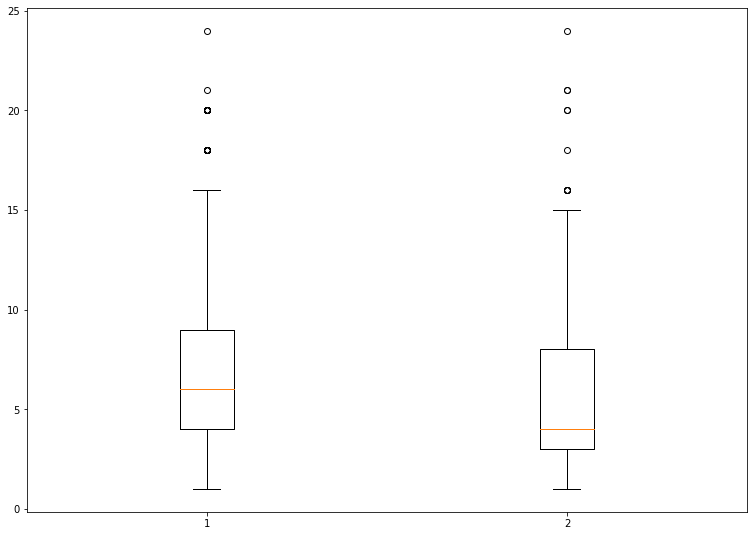

In [44]:
data_1 = t1['event_dt']
data_2 = t2['event_dt']

data = [data_1, data_2]
 
fig = plt.figure(figsize =(10, 7))
 
ax = fig.add_axes([0, 0, 1, 1])

bp = ax.boxplot(data)

plt.show()

Распределения отличаются

### Как число событий в выборках распределено по дням?

In [45]:
sample_a.sample(3)

,user_id,count,group,ab_test,event_dt,event_name,details,first_date,region,device,delta
7450,900BB01307F50F4A,1,A,recommender_system_test,2020-12-17 09:35:10,purchase,4.9900,2020-12-08,EU,Android,9 days 09:35:10
2044,DFA630F93B5685D3,1,A,recommender_system_test,2020-12-08 13:43:01,product_page,NaN,2020-12-07,EU,Android,1 days 13:43:01
11171,54762705651B3B59,1,A,recommender_system_test,2020-12-11 19:46:06,purchase,4.9900,2020-12-10,EU,Android,1 days 19:46:06


In [46]:
sample_a['event_day'] = sample_a['event_dt'].dt.date
sample_b['event_day'] = sample_b['event_dt'].dt.date

In [47]:
t1 = sample_a.groupby('event_day')['user_id'].count().reset_index().sort_values(by='event_day')
t2 = sample_b.groupby('event_day')['user_id'].count().reset_index().sort_values(by='event_day')
t1.columns = ['event_day', 'count']
t2.columns = ['event_day', 'count']

In [48]:
fig = px.bar(t1, x="event_day", y="count", title="Количество событий по дням group A")
fig.update_layout(
  xaxis_title='Дата',
  yaxis_title='Количество событий',
)

fig.show()

In [49]:
fig = px.bar(t2, x="event_day", y="count",title="Количество событий по дням group B")
fig.update_layout(
  xaxis_title='Дата',
  yaxis_title='Количество событий'
)

fig.show()

Максимум событий в обоих группах 21 декабря. В группе А этот пик единственный, а в группе В есть еще несколько дней с почти таким же количеством событий.

### Как меняется конверсия в воронке в выборках на разных этапах?

In [50]:
t1 = sample_a.groupby('event_name').agg(number_of_users = ('user_id', 'nunique')).sort_values('number_of_users', ascending=False).assign(user_share = lambda x: x['number_of_users'] / sample_a['user_id'].nunique()).reset_index()
t1

,event_name,number_of_users,user_share
0,login,2422,1.0000
1,product_page,1571,0.6486
2,purchase,773,0.3192
3,product_cart,728,0.3006


In [51]:
t1 = t1.reindex([0, 1, 3, 2])
t1

,event_name,number_of_users,user_share
0,login,2422,1.0000
1,product_page,1571,0.6486
3,product_cart,728,0.3006
2,purchase,773,0.3192


In [52]:
t2 = sample_b.groupby('event_name').agg(number_of_users = ('user_id', 'nunique')).sort_values('number_of_users', ascending=False).assign(user_share = lambda x: x['number_of_users'] / sample_b['user_id'].nunique()).reset_index()
t2

,event_name,number_of_users,user_share
0,login,811,0.9988
1,product_page,461,0.5677
2,purchase,228,0.2808
3,product_cart,225,0.2771


In [53]:
t2 = t2.reindex([0, 1, 3, 2])
t2

,event_name,number_of_users,user_share
0,login,811,0.9988
1,product_page,461,0.5677
3,product_cart,225,0.2771
2,purchase,228,0.2808


In [54]:
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'group A',
    y = ['login','product_page','product_cart','purchase'],
    x = [t1['number_of_users'][0], t1['number_of_users'][1], t1['number_of_users'][3], t1['number_of_users'][2]],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))

fig.add_trace(go.Funnel(
    name = 'group B',
    y = ['login','product_page','product_cart','purchase'],
    x = [t2['number_of_users'][0], t2['number_of_users'][1], t2['number_of_users'][3], t2['number_of_users'][2]],
    textposition = "inside",
    textinfo = "value+percent initial+percent previous",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}}))

fig.show()

В целом ситуация схожая для обеих групп, интересно, что количество покупок, больше чем количество экранов корзины, похоже, что можно покупать со сторонних сайтов или в обход корзины.

## Проведите оценку результатов A/B-тестирования

### Что можно сказать про результаты A/B-тестирования?

Выборки сильно отличаются друг от друга по количеству пользователей, но тем не менее они достаточного размера, чтобы зафиксировать прирост конверсии в 10%. 

In [55]:
t1 = t1.reset_index(drop=True)
t1

,event_name,number_of_users,user_share
0,login,2422,1.0000
1,product_page,1571,0.6486
2,product_cart,728,0.3006
3,purchase,773,0.3192


In [56]:
t2 = t2.reset_index(drop=True)
t2

,event_name,number_of_users,user_share
0,login,811,0.9988
1,product_page,461,0.5677
2,product_cart,225,0.2771
3,purchase,228,0.2808


### Проверьте статистическую разницу долей z-критерием

Так как мы проводим три теста, применим поправку Бонферрони, делим альфу на 3:

In [57]:
alpha = .05/3

for x in range(len(t1)-1):

  successes = np.array([t1['number_of_users'][x+1], t2['number_of_users'][x+1]])
  trials = np.array([t1['number_of_users'][0], t2['number_of_users'][0]])

  p1 = successes[0]/trials[0]

  p2 = successes[1]/trials[1]

  p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

  difference = p1 - p2 

  z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

  distr = st.norm(0, 1)  

  p_value = (1 - distr.cdf(abs(z_value))) * 2

  print(t1['event_name'][x+1])
  print('p-значение: ', p_value)
  
  if p_value < alpha:
    print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
  else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
    ) 

product_page
p-значение:  4.289834253490277e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница
product_cart
p-значение:  0.21088771560452946
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными
purchase
p-значение:  0.04264690707174279
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


## Вывод

По результатам теста можно сказать, что в группе В значимо конверсия УМЕНЬШИЛАСЬ на шаге с логина на страницу товара. На остальных шагах статистически значимых изменений не обнаружено.

 Но учитывая, что данные не соответствуют ТЗ, мы не можем считать эксперимент выполненным. Рекомендую перезапустить тест.